In [1]:
import pandas as pd
import keras
from sklearn.datasets import load_digits
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

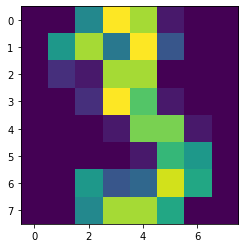

In [10]:
# plt.gray()
for i in range(4):
    plt.imshow(digits.images[i].reshape(8,8))

In [11]:
df=pd.DataFrame(digits.data)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.shape

(1797, 64)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
df['target']=digits.target

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [25]:
X_train.shape

(1437, 64)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [31]:
model.score(X_test,y_test)

0.9722222222222222

In [32]:
pred=model.predict(X_test)

In [33]:
pred

array([3, 7, 6, 0, 0, 0, 6, 3, 4, 1, 6, 4, 2, 7, 8, 3, 6, 4, 7, 2, 1, 3,
       6, 8, 7, 7, 1, 5, 2, 0, 3, 8, 9, 5, 0, 7, 1, 8, 3, 2, 5, 9, 9, 2,
       2, 9, 8, 2, 7, 5, 9, 5, 3, 4, 2, 2, 5, 8, 2, 4, 6, 6, 9, 8, 0, 0,
       3, 4, 2, 5, 5, 7, 0, 0, 5, 3, 9, 1, 8, 1, 9, 1, 9, 8, 5, 3, 4, 4,
       3, 6, 9, 4, 4, 5, 6, 9, 0, 5, 7, 0, 0, 5, 5, 9, 1, 2, 0, 2, 6, 7,
       8, 9, 7, 4, 1, 5, 4, 7, 0, 7, 5, 1, 1, 3, 6, 9, 4, 0, 0, 0, 7, 0,
       1, 5, 5, 6, 7, 5, 6, 3, 2, 5, 9, 1, 7, 0, 4, 6, 6, 9, 0, 1, 8, 1,
       1, 6, 5, 1, 3, 4, 0, 5, 1, 2, 7, 0, 6, 1, 6, 1, 8, 7, 9, 1, 8, 3,
       8, 3, 7, 9, 0, 9, 6, 9, 8, 0, 0, 9, 9, 5, 9, 8, 3, 5, 2, 4, 6, 7,
       6, 7, 4, 7, 8, 3, 3, 0, 3, 9, 2, 0, 8, 4, 9, 9, 8, 9, 9, 3, 6, 1,
       7, 5, 1, 0, 7, 8, 8, 3, 8, 1, 3, 3, 9, 7, 4, 0, 1, 1, 2, 9, 2, 1,
       7, 8, 9, 3, 8, 9, 3, 1, 0, 5, 3, 8, 5, 6, 7, 0, 5, 4, 6, 3, 3, 4,
       4, 9, 5, 1, 3, 9, 7, 5, 8, 0, 3, 3, 0, 6, 1, 4, 8, 3, 6, 5, 6, 6,
       5, 8, 4, 5, 4, 9, 2, 7, 4, 8, 6, 8, 1, 3, 3,

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  2],
       [ 0,  0,  0,  1,  0,  0,  0,  2,  1, 41]], dtype=int64)

Text(42.0, 0.5, 'Truth')

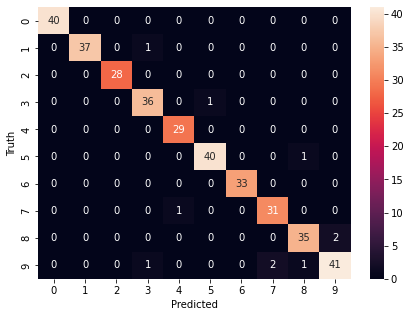

In [36]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

